# Seattle Traffic Accident Severity Prediction (Week 3)
## 1. Introduction
Traffic accident has risen to the 3rd major reason of mortality among countries by 2020, which also has a negative impact on economical society. Citizens feel lack of security when they drive on roads, cross the street or even walk along the pedestrain. Vehicle manufactures have invested large amount of professionals and fundings to increase the quality of vehicles but all these efforts have less contribution to traffic rushes. It is the time for government to make some actions in order to find out the main causes of traffic accidents. 
## 2. Business Problem
The purpose of this project is to analyze the collision dataset for the city of Seattle and find patterns and determinate key factors such as weather, light and road conditions, drug or alcohol influence, driver inattention to provide the best traffic accident severity prediction. It will use various analytical techniques and machine learning classification algorithms such as logistic regression, decision tree analysis, k-nearest-neighbors, support vector machine,etc.
## 3. Target Audience
This study can mainly help transportation secter governments improve traffic policies or update public facilities such as street lamp,  speed bumps at proper positions. Car rental or insurance companies are also among the target groups of this analysis because they can classify potentical customers and design different service content based on customers driving habits.

## 4. Data
Seattle Department of Transportation provides traffic accident cases from 2004 for almost 15 years to discover the reasons behind these collisions. The dataset contains all kinds of collisions in Seattle from 2004 to 2020. To predict the damage level of road accidents, the indicator 'SEVERITYCODE' is chosen as the dependent variable. Normally, the degree of collision climbs up from property damage Only collision injury to injury collision. Among dozens of attributes, this project concentrates on both nature and human factors which may lead to car accidents. Nature factors are made up by 'WEATHER','ROADCOND' and 'LIGHTCOND' which represents weather, road and view circumstance respectively. On the other hand, human factors usually reflects the status of drivers such as 'INATTENTIONIND','UNDERINFL', and 'SPEEDING' which shows the concentration of drivers mind, drug or alcohol influence and overspeed. All attributes involved in this projects are shown below.

| Attribute |Data type, length| Description |
| :--- | :--- | :--- |
| WEATHER | Text,300 | A description of the weather conditions during the time of the collision.
| ROADCOND | Text,300 | The condition of the road during the collision.
| LIGHTCOND | Text,300 | The light conditions during the collision.
| INATTENTIONIND | Text,1 | Whether or not collision was due to inattention.(Y/N)
| UNDERINFL | Text,10 | Whether or not a driver involved was under the influence of drugs or alcohol.
| SPEEDING | Text,1 | Whether or not speeding was a factor in the collison.(Y/N)

### 4.1 Data Source
The full dataset can be found [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv).

### 4.2 Metadata
The metadata can be found [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf).

### 4.3 Display the data
Load the raw dataset.

In [1]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-17 07:29:19--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  39.6MB/s   in 1.8s   

2020-09-17 07:29:21 (39.6 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [2]:
import pandas as pd
raw_data = pd.read_csv('Data-Collisions.csv',index_col='OBJECTID')
raw_data.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,2,-122.323148,47.703140,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,1,-122.347294,47.647172,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
3,1,-122.334540,47.607871,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
4,1,-122.334803,47.604803,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
5,2,-122.306426,47.545739,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


The dataset has 194673 records of car accidents with 38 attributes.

In [3]:
raw_data.shape

(194673, 37)

# 5. Methodology

### 5.1 Data Cleansing
Firstly, we check the missing data in our dataset which has shown below. 'SEVERITYCODE' has no missing data while 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND' and 'SPEEDING' all have missing values to some extent, especially for 'INATTENTIONIND' and 'SPEEDING' which only have less than 30 thousand items in the whole dataset. We need to check these indexes further.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 1 to 219547
Data columns (total 37 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null object
JUNCTIONTYPE      188344 non-null obj

 'INATTENTIONIND' and 'SPEEDING' have less data because they only show the 'Y' which means the yes while ignoring the 'N' for no. So we have to fill in the missing data.

In [6]:
#The range of values for core indexes.
def range_values(indexes):
    for index in indexes:
        print('Index:{}'.format(index))
        print(raw_data[index].value_counts())
        print('--------------------------------------')

indexes = ['SEVERITYCODE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']
range_values(indexes)

Index:SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
--------------------------------------
Index:INATTENTIONIND
Y    29805
Name: INATTENTIONIND, dtype: int64
--------------------------------------
Index:UNDERINFL
N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64
--------------------------------------
Index:WEATHER
Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
--------------------------------------
Index:ROADCOND
Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water 

In [7]:
#processing missing data
#Encoding inattention (0 = No, 1 = Yes)
#Encoding speeding(0 = No, 1 = Yes)
def transform_fill_missing_data(index):
    raw_data[index].replace(to_replace='Y',value=1,inplace=True)
    raw_data[index].fillna(0,inplace=True)

transform_fill_missing_data('INATTENTIONIND')
transform_fill_missing_data('SPEEDING')

#Encoding under the influence (0 = No, 1 = Yes)
raw_data['UNDERINFL'].replace(to_replace=['N','0','Y','1'],value=[0,0,1,1],inplace=True)

#Encoding weather conditions(1 = Clear, 2 = Overcast and Cloudy, 3 = Windy, 4 = Rain and Snow
raw_data['WEATHER'].replace(to_replace=["Clear","Raining","Overcast","Unknown",
                                        "Snowing","Other","Fog/Smog/Smoke",
                                        "Sleet/Hail/Freezing Rain","Blowing Sand/Dirt",
                                        "Severe Crosswind","Partly Cloudy"],
                            value=[1,4,2,np.nan,4,np.nan,3,4,3,3,2],inplace=True)

#Encoding road conditions(1 = Dry, 2 = Mushy, 3 = Wet)
raw_data['ROADCOND'].replace(to_replace=["Dry","Wet","Unknown","Ice","Snow/Slush",
                                         "Other","Standing Water","Sleet/Hail/Freezing Rain",
                                         "Sand/Mud/Dirt","Oil"],
                             value=[1,3,np.nan,3,2,np.nan,3,3,2,2],inplace=True)

#Encoding light conditions(1 = Light, 2 = Medium, 3 = Dark)
raw_data['LIGHTCOND'].replace(to_replace=["Daylight","Dark - Street Lights On","Unknown",
                                          "Dusk","Dawn","Dark - No Street Lights",
                                          "Dark - Street Lights Off","Other","Dark - Unknown Lighting"],
                              value=[1,2,np.nan,2,2,3,3,np.nan,3],inplace=True)
raw_data.isnull
range_values(indexes)


Index:SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
--------------------------------------
Index:INATTENTIONIND
0.0    164868
1.0     29805
Name: INATTENTIONIND, dtype: int64
--------------------------------------
Index:UNDERINFL
0.0    180668
1.0      9121
Name: UNDERINFL, dtype: int64
--------------------------------------
Index:WEATHER
1.0    111135
4.0     34165
2.0     27719
3.0       650
Name: WEATHER, dtype: int64
--------------------------------------
Index:ROADCOND
1.0    124510
3.0     48798
2.0      1143
Name: ROADCOND, dtype: int64
--------------------------------------
Index:LIGHTCOND
1.0    116137
2.0     56911
3.0      2747
Name: LIGHTCOND, dtype: int64
--------------------------------------
Index:SPEEDING
0.0    185340
1.0      9333
Name: SPEEDING, dtype: int64
--------------------------------------


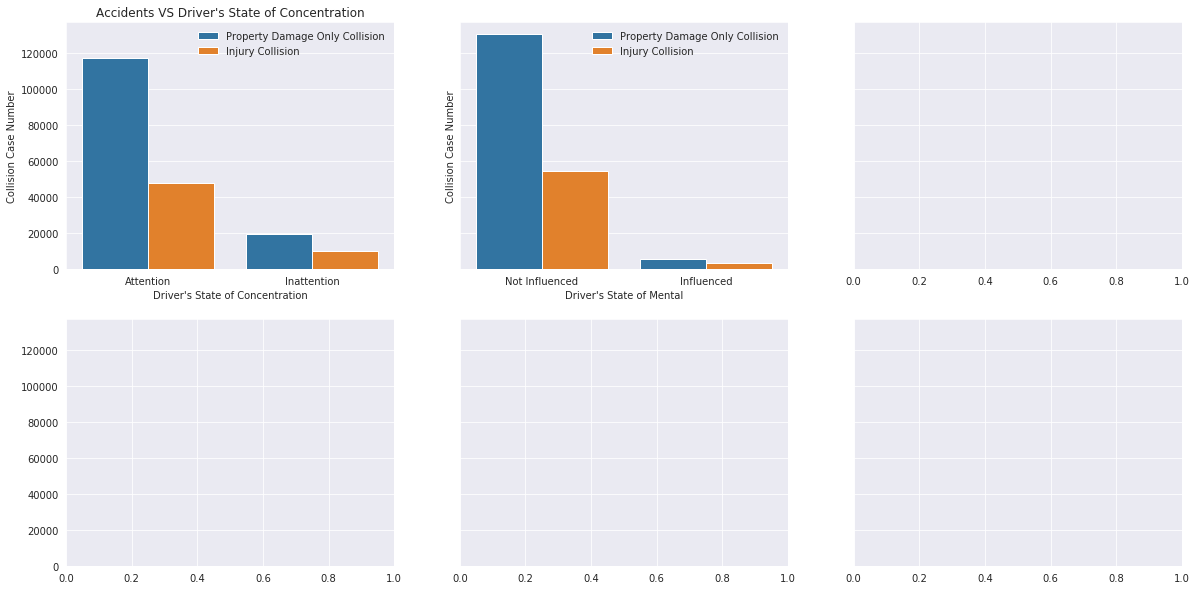

In [38]:
severity_level = ['Property Damage Only Collision','Injury Collision']
sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharey=True)

fig_inattention = sns.countplot(ax=axes[0,0],x='INATTENTIONIND',hue='SEVERITYCODE',data=raw_data)
fig_inattention.set(xlabel="Driver's State of Concentration", ylabel="Collision Case Number",
                    xticklabels=['Attention','Inattention'],title="Accidents VS Driver's State of Concentration")
fig_inattention.legend(severity_level,frameon=False)

fig_underinfluence = sns.countplot(ax=axes[0,1],x='UNDERINFL',hue='SEVERITYCODE',data=raw_data)
fig_underinfluence.set(xlabel="Driver's State of Mental", ylabel = "Collision Case Number",
                       xticklabels=['Not Influenced','Influenced'],title="Accidents VS Driver's State of Mental")
fig_underinfluence.legend(severity_level,frameon=False)

fig_inattention = sns.countplot(ax=axes[0,0],x='INATTENTIONIND',hue='SEVERITYCODE',data=raw_data)
fig_inattention.set(xlabel="Driver's State of Concentration", ylabel = "Collision Case Number",
                    xticklabels=['Attention','Inattention'],title="Accidents VS Driver's State of Concentration")
fig_inattention.legend(severity_level,frameon=False)

fig_speeding = sns.countplot(ax=axes[0,1],x='SPEEDING',hue='SEVERITYCODE',data=raw_data)
fig_speeding.set(xlabel="Driver's State of Mental", ylabel = "Collision Case Number",
                 xticklabels=['Not Influenced','Influenced'],title="Accidents VS Driver's State of Concentration")
fig_speeding.legend(severity_level,frameon=False)

plt.show()

## 6. Results

## 7. Discussion

## 8. Conclusion